<a href="https://colab.research.google.com/github/Shonit262/ANNWindSpeed/blob/ANN/WindSpeedPredictionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [31]:
data=pd.read_csv('jaisalmer-2.csv',index_col='date_time',parse_dates=True)

In [32]:
data=data[(data['windspeedKmph']!=0)]

In [33]:
print(data.shape)


(17512, 24)


In [34]:
data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2009-04-01 00:00:00,37,23,0.0,11.6,8,42,10:39 AM,12:10 AM,06:37 AM,07:04 PM,7,25,25,24,15,32,32,0.0,1007,24,10,236,7,jaisalmer
2009-04-01 06:00:00,37,23,0.0,11.6,8,42,10:39 AM,12:10 AM,06:37 AM,07:04 PM,7,26,26,27,15,7,27,0.0,1009,27,10,240,9,jaisalmer
2009-04-01 12:00:00,37,23,0.0,11.6,8,42,10:39 AM,12:10 AM,06:37 AM,07:04 PM,5,36,36,37,22,6,14,0.0,1007,37,10,267,19,jaisalmer
2009-04-01 18:00:00,37,23,0.0,11.6,8,42,10:39 AM,12:10 AM,06:37 AM,07:04 PM,5,27,27,29,10,13,21,0.0,1007,29,10,264,5,jaisalmer
2009-04-02 00:00:00,37,26,0.0,11.6,8,50,11:44 AM,01:11 AM,06:36 AM,07:04 PM,5,25,25,27,26,20,24,0.0,1006,27,10,214,13,jaisalmer


In [ ]:
data.corr()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
maxtempC,1.000000,0.928389,NaN,0.665552,0.964626,-0.016421,0.603253,0.861135,0.859394,0.871741,0.213937,0.054392,0.076318,0.010121,-0.838568,0.871710,-0.000812,0.513174,0.357714
mintempC,0.928389,1.000000,NaN,0.600190,0.933628,-0.020246,0.731536,0.895907,0.894597,0.880391,0.203843,0.183185,0.213079,0.062368,-0.851485,0.880299,-0.064831,0.474924,0.373023
totalSnow_cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sunHour,0.665552,0.600190,NaN,1.000000,0.656771,0.002786,0.444191,0.584234,0.587387,0.572974,0.260144,-0.116770,0.096853,-0.042295,-0.631635,0.578068,0.051728,0.359903,0.368901
uvIndex,0.964626,0.933628,NaN,0.656771,1.000000,-0.017910,0.614857,0.853897,0.852310,0.862922,0.202884,0.034409,0.090422,-0.007391,-0.818671,0.863025,0.020183,0.491858,0.350071
moon_illumination,-0.016421,-0.020246,NaN,0.002786,-0.017910,1.000000,-0.017733,-0.019911,-0.020744,-0.017281,0.023253,-0.008346,0.000003,0.001311,-0.005245,-0.017666,-0.000606,0.020226,0.022922
DewPointC,0.603253,0.731536,NaN,0.444191,0.614857,-0.017733,1.000000,0.682805,0.685137,0.564419,0.340906,0.313157,0.747103,0.126199,-0.752158,0.565339,-0.140959,0.310386,0.526848
FeelsLikeC,0.861135,0.895907,NaN,0.584234,0.853897,-0.019911,0.682805,1.000000,0.999136,0.974456,0.119107,0.189967,0.095267,0.058980,-0.863449,0.974425,-0.061024,0.467586,0.376617
HeatIndexC,0.859394,0.894597,NaN,0.587387,0.852310,-0.020744,0.685137,0.999136,1.000000,0.971996,0.125069,0.190992,0.099527,0.059127,-0.865443,0.973135,-0.061200,0.465791,0.381185
WindChillC,0.871741,0.880391,NaN,0.572974,0.862922,-0.017281,0.564419,0.974456,0.971996,1.000000,0.042473,0.118093,-0.069876,0.027229,-0.798367,0.999310,-0.025915,0.480221,0.285677


In [35]:
data.drop(columns=['sunrise','sunset','moonrise','moonset','WindGustKmph','moon_illumination','totalSnow_cm','location','maxtempC','mintempC','uvIndex','HeatIndexC','FeelsLikeC','winddirDegree','WindChillC'],inplace=True)

In [36]:
data=data[(data['windspeedKmph']>10)]

In [41]:
from scipy import stats
import numpy as np
z = (stats.zscore(data))

In [38]:
 data= data[(z < 3).all(axis=1)]

In [ ]:
from scipy import stats
import numpy as np
z = (stats.zscore(data))

In [40]:
print(data.shape)

(10520, 9)


In [42]:
 data= data[(z > -3).all(axis=1)]

In [ ]:
print(data.shape)

(10297, 9)


In [43]:
data.dtypes

sunHour          float64
DewPointC          int64
cloudcover         int64
humidity           int64
precipMM         float64
pressure           int64
tempC              int64
visibility         int64
windspeedKmph      int64
dtype: object

In [44]:
s = (data.dtypes == 'int64')
int_data = list(s[s].index)

print("integer data type")
print(int_data)


integer data type
['DewPointC', 'cloudcover', 'humidity', 'pressure', 'tempC', 'visibility', 'windspeedKmph']


In [ ]:
for col in int_data:
    data[col]=data[col].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
missing=data.isnull().sum()
print(missing[missing>0])

Series([], dtype: int64)


In [ ]:
data.corr()

,sunHour,DewPointC,cloudcover,humidity,precipMM,pressure,tempC,visibility,windspeedKmph
sunHour,1.000000,0.444191,-0.116770,0.096853,-0.042295,-0.631635,0.578068,0.051728,0.368901
DewPointC,0.444191,1.000000,0.313157,0.747103,0.126199,-0.752158,0.565339,-0.140959,0.526848
cloudcover,-0.116770,0.313157,1.000000,0.305748,0.240062,-0.223086,0.117902,-0.306282,0.068175
humidity,0.096853,0.747103,0.305748,1.000000,0.163332,-0.312979,-0.068713,-0.183176,0.445409
precipMM,-0.042295,0.126199,0.240062,0.163332,1.000000,-0.084932,0.026953,-0.653705,0.008574
pressure,-0.631635,-0.752158,-0.223086,-0.312979,-0.084932,1.000000,-0.800955,0.092039,-0.471321
tempC,0.578068,0.565339,0.117902,-0.068713,0.026953,-0.800955,1.000000,-0.025714,0.289563
visibility,0.051728,-0.140959,-0.306282,-0.183176,-0.653705,0.092039,-0.025714,1.000000,-0.016293
windspeedKmph,0.368901,0.526848,0.068175,0.445409,0.008574,-0.471321,0.289563,-0.016293,1.000000


Text(0, 0.5, 'WindSpeed')

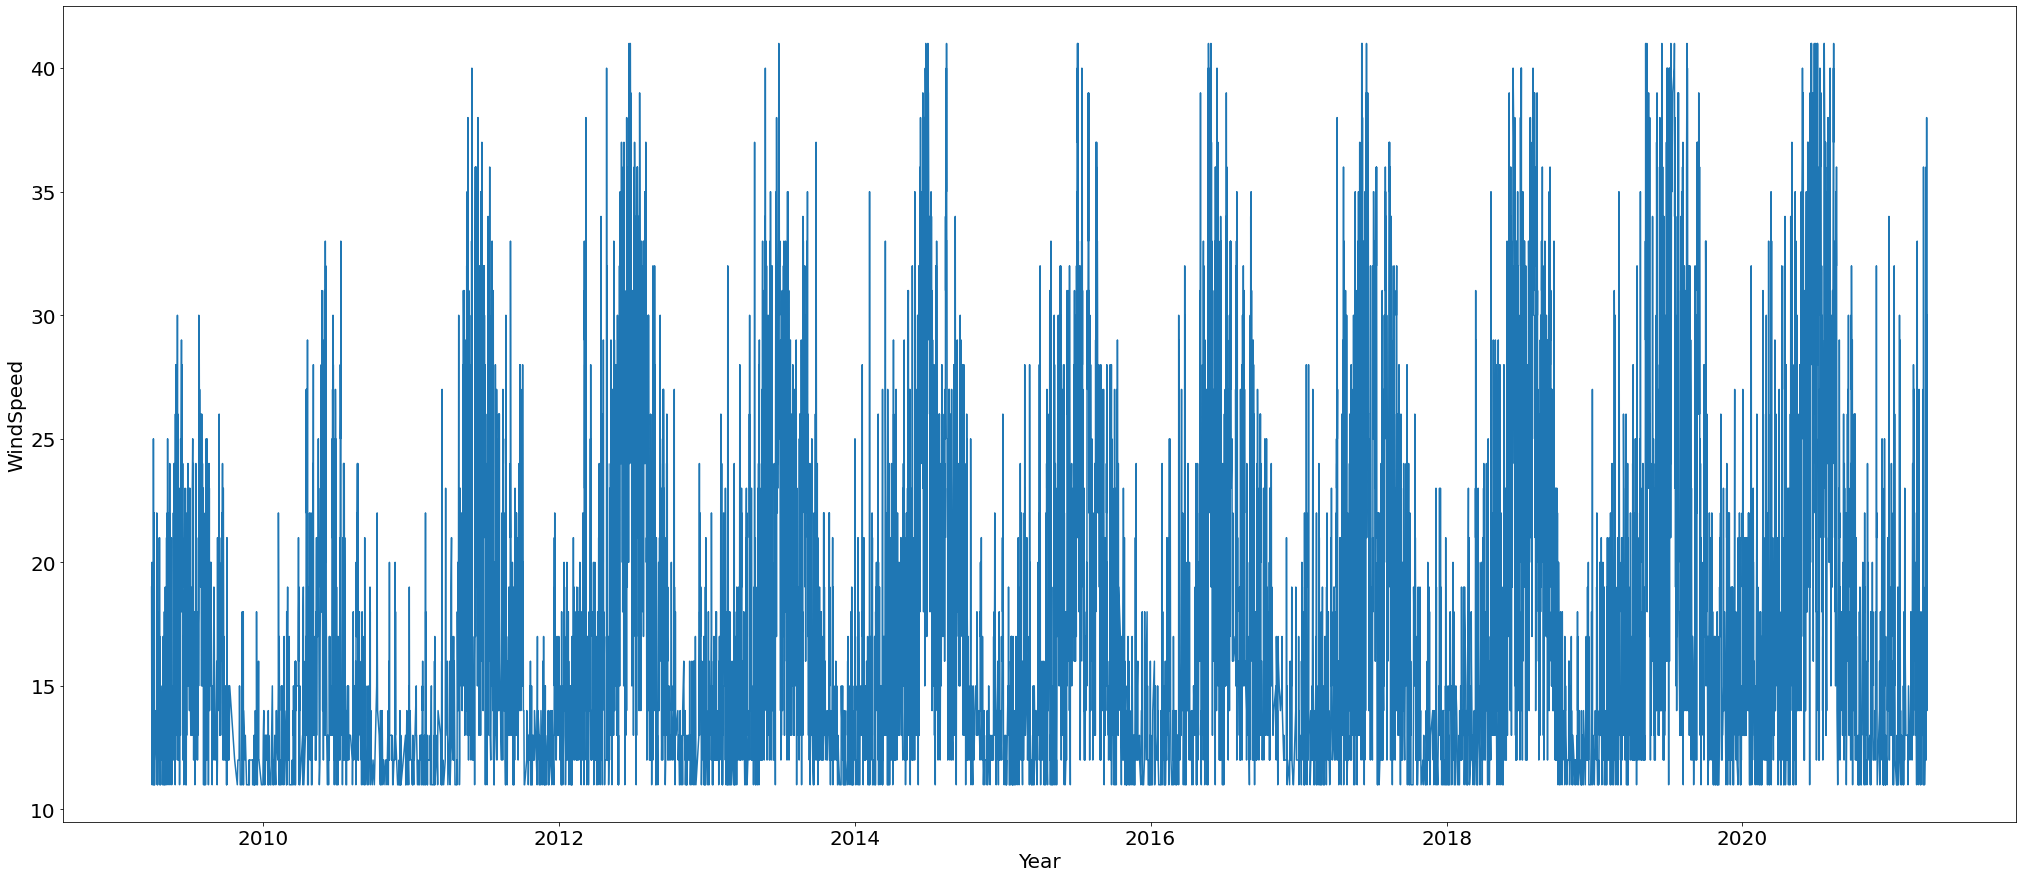

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,15))
plt.rcParams['font.size']='20'
plt.plot(data['windspeedKmph'])
plt.xlabel('Year')
plt.ylabel('WindSpeed')

In [84]:
X1=data.copy()


In [85]:
print(X1.shape)

(10297, 9)


In [86]:
X1.drop(columns=['windspeedKmph'],inplace=True)


In [48]:
Y1=data['windspeedKmph']
print(Y1.shape)
print(Y1.head())


(10297,)
date_time
2009-04-01 12:00:00    19
2009-04-02 00:00:00    13
2009-04-02 06:00:00    19
2009-04-02 12:00:00    20
2009-04-02 18:00:00    11
Name: windspeedKmph, dtype: int64


In [49]:
import numpy as np

In [87]:
Y=np.array(Y1)

In [88]:
Y1=Y.reshape(-1,1)

In [ ]:
print(Y1.shape)

(16550, 1)


In [89]:
from sklearn.metrics import mean_absolute_error

In [90]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [91]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=.05,random_state=42)
print(X_test.shape)

(515, 8)


In [93]:

from sklearn.preprocessing import StandardScaler
# load data
# create scaler
scaler = StandardScaler()
# fit scaler on data
# apply transform
X_train= (scaler.fit_transform(X_train))

In [94]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = keras.Sequential([layers.BatchNormalization(input_shape=[8]),
    layers.Dense(1024, activation='relu', input_shape=[8]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])


In [95]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [96]:
model.compile(optimizer='adam',loss='mae')


In [97]:
h=model.fit(X_train, Y_train,validation_split=0.2,batch_size=32,epochs=100,verbose=1,callbacks=[early_stopping])

Epoch 1/100
245/245 [==============================] - 4s 13ms/step - loss: 14.2265 - val_loss: 4.7508
Epoch 2/100
245/245 [==============================] - 3s 12ms/step - loss: 4.8322 - val_loss: 4.0400
Epoch 3/100
245/245 [==============================] - 3s 12ms/step - loss: 4.6137 - val_loss: 4.3367
Epoch 4/100
245/245 [==============================] - 3s 12ms/step - loss: 4.4809 - val_loss: 4.0456
Epoch 5/100
245/245 [==============================] - 3s 12ms/step - loss: 4.4810 - val_loss: 3.9699
Epoch 6/100
245/245 [==============================] - 3s 11ms/step - loss: 4.3104 - val_loss: 3.9774
Epoch 7/100
245/245 [==============================] - 3s 12ms/step - loss: 4.2773 - val_loss: 4.0379
Epoch 8/100
245/245 [==============================] - 3s 12ms/step - loss: 4.2262 - val_loss: 4.0007
Epoch 9/100
245/245 [==============================] - 3s 12ms/step - loss: 4.2504 - val_loss: 3.9735
Epoch 10/100
245/245 [==============================] - 3s 12ms/step - loss: 4.20

<Figure size 2520x1080 with 0 Axes>

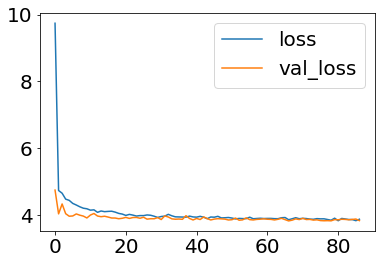

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35,15))
plt.rcParams['font.size']='20'
ans=pd.DataFrame(h.history)
ans.loc[:,['loss','val_loss']].plot();


In [105]:

from sklearn.preprocessing import StandardScaler
# load data
# create scaler
scaler = StandardScaler()
# fit scaler on data
# apply transform
X_test= (scaler.fit_transform(X_test))

In [106]:
Predictions=model.predict(X_test)
print(X_test.shape)

(515, 8)


In [107]:
print(Predictions.shape)


(515, 1)


In [108]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [109]:
print(mean_absolute_error(Predictions,Y_test))


3.6566632280071962


In [113]:
print(100-MAPE(Y_test,Predictions))

80.54827329333001


In [111]:
print(rmse(Y_test,Predictions))

5.04218701259176


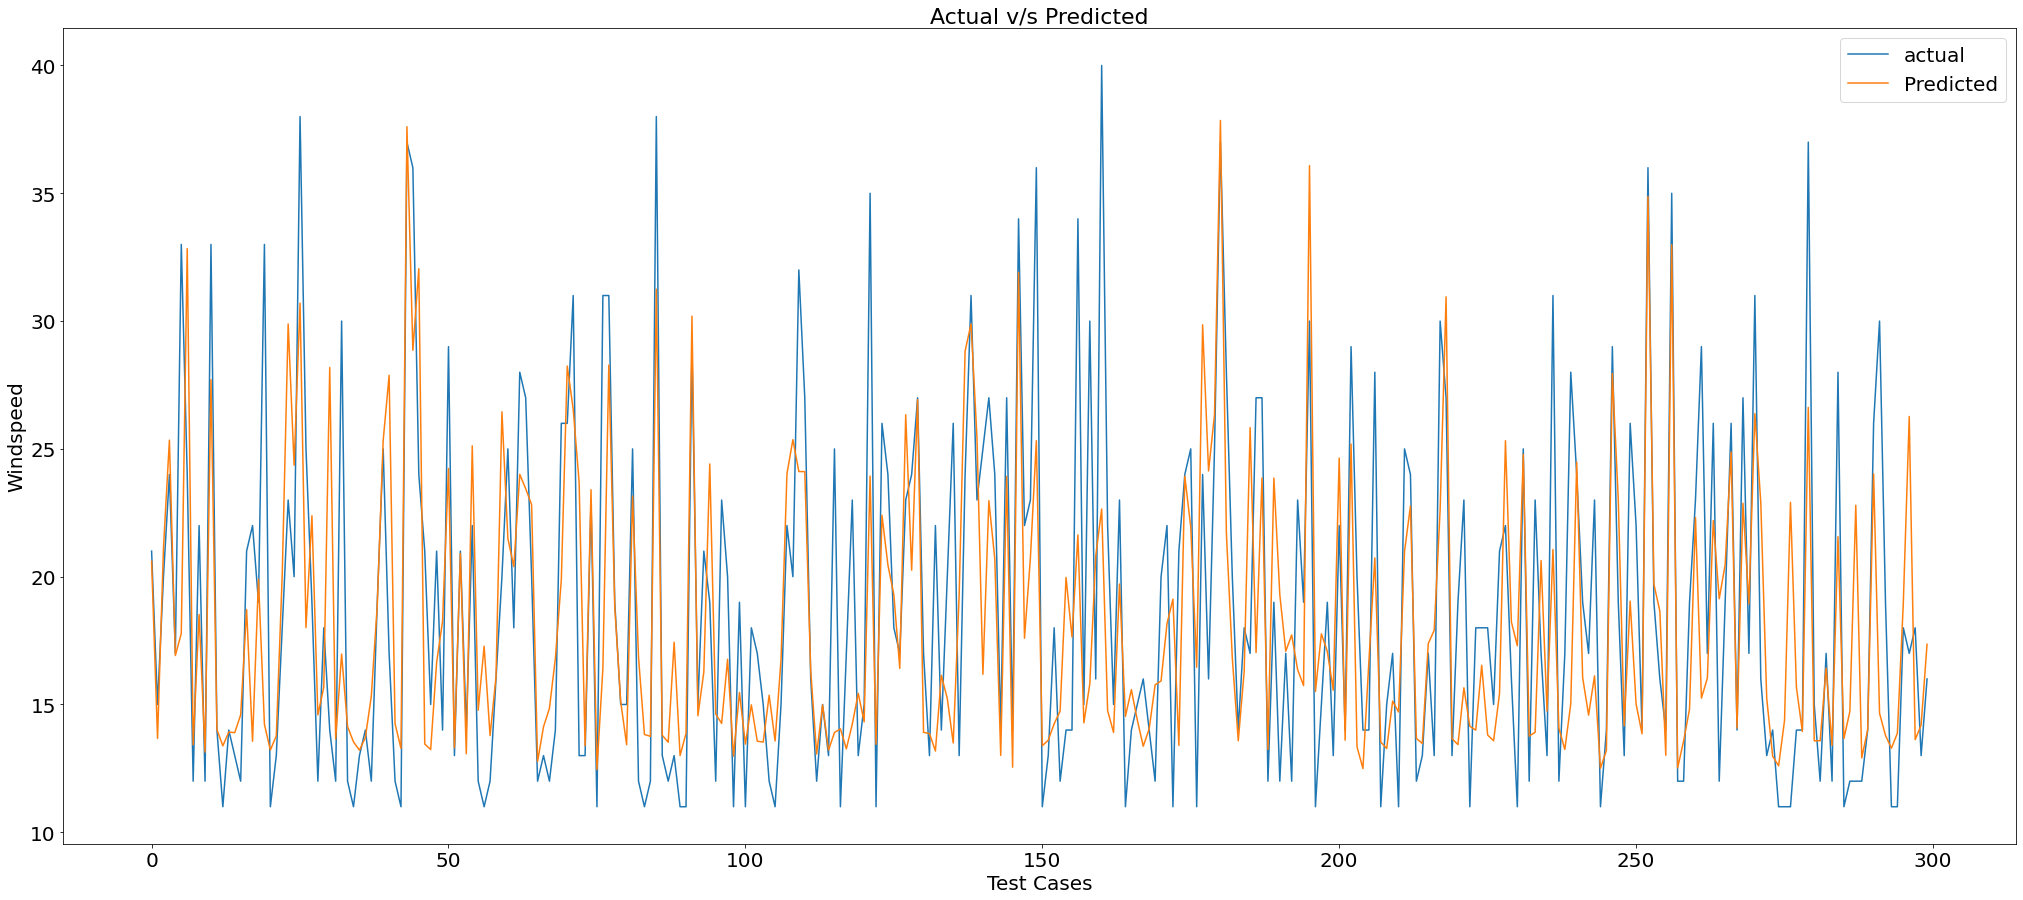

<Figure size 432x288 with 0 Axes>

In [128]:
plt.figure(figsize=(35,15))
plt.rcParams['font.size']='20'
plt.plot(Y_test[:300],label='actual')
plt.plot(Predictions[:300],label='Predicted')
plt.title('Actual v/s Predicted',fontsize=22)
plt.ylabel('Windspeed',)
plt.xlabel('Test Cases')
plt.legend()
plt.show()
plt.savefig('plot.jpg')

